In [1]:
import pandas as pd

In [2]:
path = '~/solarcity/ml/candidates.csv'

In [3]:
df = pd.read_csv(path, encoding ='utf-8')
df


,Id,Last name,First name,Middle name,Registration address,Home address,Phone number,Email,Birth date,Confession,...,Created at [Candidate family members],Updated at [Candidate family members],Id [Candidate children experiences],Organization name [Candidate children experiences],Organization contacts [Candidate children experiences],Position [Candidate children experiences],Functions [Candidate children experiences],Children age [Candidate children experiences],Created at [Candidate children experiences],Updated at [Candidate children experiences]
0,2,asdf,asdf,asdf,asdf,asdf,2341234,shabalinsky@yandex.ru,10 сентября 2015,Атеизм,...,"сентября 10, 2015 10:10","сентября 10, 2015 10:10",3,sdg,sdfg,sdg,dfg,sdfg,"сентября 10, 2015 10:10","сентября 10, 2015 10:10"
1,3,Белоглазов,денис,александрович,А. лежена 5 132,А. лежена 5 132,89529402367,beioglazov-deni@mail.ru,28 февраля 1990,Православие,...,"сентября 27, 2015 15:15","сентября 27, 2015 15:15",4,-,-,-,-,-,"сентября 27, 2015 15:15","сентября 27, 2015 15:15"
2,4,Винокурова,Наталия,Ростиславна,"город Новосибирск, улица Революции, дом 10, кв...","город Новосибирск, улица Некрасова, дом 63/1, ...",+7-903-999-69-96,vinnata@list.ru,30 ноября 1984,Православие,...,"октября 15, 2015 11:34,октября 15, 2015 11:34,...","октября 15, 2015 11:34,октября 15, 2015 11:34,...",5,"ДБФ ""Солнечный город""","город Новосибирск, Промышленная 4а",волонтер,-,4-18,"октября 15, 2015 11:34","октября 15, 2015 11:34"
3,5,Шелковников,Андрей,Борисович,"г. Новосибирск, ул. Крылова, д. 45, кв. 54","г. Новосибирск, ул. Крылова, д. 45, кв. 54",+79139113153,andrey_pm01@mail.ru,27 марта 1984,Православие,...,"октября 23, 2015 06:46,октября 23, 2015 06:46","октября 23, 2015 06:46,октября 23, 2015 06:46",6,-,-,-,В 2004м году преподавал в течении одной четвер...,-,"октября 23, 2015 06:46","октября 23, 2015 06:46"
4,6,Панова,Жанна,Николаевна,"г. Новосибирск, ул. Б.Богаткова, д.218, кв. 16","г. Новосибирск, ул. Б.Богаткова, д.218, кв. 16",89139485152,lady.fiorellino@mail.ru,18 марта 1981,Православие,...,"октября 25, 2015 08:55","октября 25, 2015 08:55",7,Солнечный город (Детский дом №6 Г.Новосибирска),-,Волонтер,-,10-17,"октября 25, 2015 08:55","октября 25, 2015 08:55"
5,7,Коробова,Мария,Сергеевна,город Киров,"Новосибирск, Иванова, 11, 85",89538032572,mkorobova@ngs.ru,19 ноября 1992,Православие,...,"октября 26, 2015 09:49","октября 26, 2015 09:49","9,8","Заочная Школа СУНЦ НГУ,частный репетитор по ма...","Новосибирск, ул. Пирогова, 11 (Ляпунова, 3), т...","Преподаватель физики,репетитор","Проверка работ школьников,Преподавание математ...","12-17 лет,12-17 лет","октября 26, 2015 09:49,октября 26, 2015 09:49","октября 26, 2015 09:49,октября 26, 2015 09:49"
6,8,Саломатникова,Евгения,Викторовна,"Г.Новосибирск, ул. Жуковского, 117/1 кв 62","Г.Новосибирск, ул. Жуковского, 117/1 кв 62",89831377135,evgenia.s@ngs.ru,24 июня 1982,Православие,...,"октября 27, 2015 05:49,октября 27, 2015 05:49","октября 27, 2015 05:49,октября 27, 2015 05:49",10,-,-,-,-,-,"октября 27, 2015 05:49","октября 27, 2015 05:49"
7,9,Сидорова,Александра,Михайловна,Петухова 104-64,Петухова 104-64,89537779338,sanya-girl@mail.ru,9 августа 1990,Атеизм,...,"октября 27, 2015 09:53","октября 27, 2015 09:53",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,Петрина,Мария,Леонидовна,"Республика Бурятия, Г. Улан-Удэ. Ул. Добролю...","Г. Новосибирск, Ул. Путевая 6 - 16",8-913-700-4198,petrins89@mail.ru,27 января 1989,Христианство,...,"октября 27, 2015 16:52","октября 27, 2015 16:52",11,"Няня в семье, АНО КОЦ ""Свеча"", волонтерская д...",-,Няня. Воспитатель. Педагог. Ведущий.,-,-,"октября 27, 2015 16:52","октября 27, 2015 16:52"
9,11,Елизарова,Кристина,Алексеевна,кемеровская обл. г. Прокопьевск,"Новосибирск, ул. Бориса Богаткова, 188/1",8 923 234 37 95,elizarova.ka@mail.ru,13 июня 2015,христианство,...,"октября 27, 2015 17:58,октября 27, 2015 17:58","октября 27, 2015 17:58,октября 27, 2015 17:58","13,12","Языковая школа ""ИНОТЕКСТ"",2toYou (бизнес-школа)","201-13-31, Ольги Жилиной 73/2,

In [4]:
no_variants = {u'нет', u'никогда', u'не употребляю'}

def categorize_bad_habbits(row):
    return [not any(nv in p.lower() for nv in no_variants) for p in row]

In [5]:
from collections import Counter
confessions = Counter(s.lower() for s in df['Confession'])
confessions = [c for c, c_count in confessions.items() if c_count > 2]
cfs = dict(zip(confessions, range(len(confessions))))

len(cfs), confessions
for i in confessions:
    print i

categories = dict(enumerate([
    u'прав',
    u'атеи',
    u'агност',
    u'христ',
    u'ислам',
    u'протест',
    u'буддизм',
    u'катол',], start=1))
 
def get_category(field):
    for c_id, c in categories.items():
        if c in field.lower():
            return c_id
    return 0
        
def categorize_confession(row):
    return map(get_category, row)

православное
православный
православие
протестанизм
буддизм
агностик
атеизм
католицизм
агностицизм
христианка
протестантизм
нет
христианское
христианин
ислам
атеист
атеист 
православная
христианство
-
православие 
христианин 
христианство 


In [6]:
def simple_categorize(row):
    statuses = set(unicode(i).lower() for i in row)
    ms = dict(zip(statuses, range(len(statuses))))

    return [ms[unicode(p).lower()] for p in row]

In [7]:
def categorize_age(row):
    res = []
    for r in row:
        try:
            res.append(int(r))
        except:
            if '-' in r:
                res.append(
                    (int(r.split('-')[0]) + int(r.split('-')[1][:2])) / 2
                )
            
            else:

                res.append(0)
    return res

In [8]:
from datetime import date

EPOCH = date(1970,1,1)
months = {
    u'января': 1,
    u'февраля': 2,
    u'марта': 3,
    u'апреля': 4,
    u'мая': 5,
    u'июня': 6,
    u'июля': 7,
    u'августа': 8,
    u'сентября': 9,
    u'октября': 10,
    u'ноября': 11,
    u'декабря': 12,
}
def parse_dt(dt):
    try:
        day, month, year = dt.split()
        month = months.get(month)
        if month is not None:
            d = date(int(year), month, int(day))
            return d
    except:
        pass
    return 0

def unixday(dt_str):
    dt = parse_dt(dt_str)
    if dt:
        return (dt - EPOCH).days
    else:
        return 0

In [9]:
TODAY = date(2019, 9, 28)
UNIXTODAY = (TODAY - EPOCH).days
def calc_work_period(start, end):
    res = []
    for d1, d2 in zip(start, end):
        d1, d2 = unixday(d1), unixday(d2)
        if d2 == 0:
            d2 = UNIXTODAY
        res.append(d2 - d1)
    return res

#### Готовим фичи для классификации

In [26]:
from collections import OrderedDict


fit_df = pd.DataFrame(
    OrderedDict((
        ('Id', df['Id']),
        ('Age', map(unixday, df['Birth date'])),
        ('Health status', simple_categorize(df['Health status'])),
        ('Alcohol', simple_categorize(df['Alcohol'])),
        ('Psychoactive', categorize_bad_habbits(df['Psychoactive'])),
        ('Drugs', categorize_bad_habbits(df['Drugs'])),
        ('Child crime', categorize_bad_habbits(df['Child crime'])),
        ('Tobaco', categorize_bad_habbits(df['Tobacco'])),
        ('Confession', categorize_confession(df['Confession'])),
        ('Martial status', simple_categorize(df['Martial status'])),
        ('House type', simple_categorize(df['House type'])),
        ('Number of rooms', simple_categorize(df['Number of rooms'])),
        ('Peoples for room', simple_categorize(df['Peoples for room'])),
        ('Education [Candidate educations]', simple_categorize(df['Education [Candidate educations]'])),
        
        ('Work position', simple_categorize(df['Work position'])),
        ('Work functions', simple_categorize(df['Work functions'])),
        ('Work start date', map(unixday, df['Work start date'])),
        ('Work end date', map(unixday, df['Work end date'])),
        ('Work period', calc_work_period(df['Work start date'], df['Work end date'])),
        
        ('Russian citizenship', df['Russian citizenship']),
        ('Pets', map(len, df['Pets'])),
        ('Hobby', map(len, df['Hobby'])),
        ('Program reason', map(len, df['Program reason'])),
        ('Person character', map(len, df['Person character'])),
        ('Person information', map(len, df['Person information'])),
        ('Help reason', map(len, df['Help reason'])),
        ('Child age', categorize_age(df['Child age'])),
        ('Child gender', simple_categorize(df['Child gender'])),
        ('Child character', map(len, df['Child character'])),

        ('Visit frequency', simple_categorize(df['Visit frequency'])),
        ('Invalid child', df['Invalid child']),
        (u'Статус', df[u'Статус']),
    ))
)
fit_df.to_csv('~/solarcity/ml/candidates_fit.csv', encoding="utf-8")

#### Обучение

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [161]:
X = fit_df.iloc[1:, 1:-1]
y = fit_df.iloc[1:, -1]
clf = RandomForestClassifier(
    n_estimators=100, max_depth=2, random_state=0
)


In [162]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print scores

[0.93155894 0.93155894 0.93129771 0.93129771 0.93129771]


In [163]:
clf.fit(X, y)
for i, j in zip(fit_df.columns[1:-1], clf.feature_importances_):
    print i, j

Age 0.12426731107184258
Health status 0.003407171501550891
Alcohol 0.03762397295009931
Psychoactive 0.0
Drugs 0.0
Child crime 0.0
Tobaco 0.004937337051177818
Confession 0.017646316331658366
Martial status 0.024028013927671905
House type 0.014143956450030306
Number of rooms 0.024513685270466268
Peoples for room 0.011718064321628687
Education [Candidate educations] 0.058288314786258295
Work position 0.0565584366541019
Work functions 0.031690556485730846
Work start date 0.030631872772252048
Work end date 0.0014959647061054324
Work period 0.0028746477466991337
Russian citizenship 0.0025922044414163708
Pets 0.010239424356331562
Hobby 0.029751183078395728
Program reason 0.061902887973238924
Person character 0.10702781899137717
Person information 0.04802145417805079
Help reason 0.09863647074503072
Child age 0.008967821662943673
Child gender 0.030976233711851365
Child character 0.10354532320278627
Visit frequency 0.045978723202667895
Invalid child 0.008534832428635708


In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cb, y_cb, test_size=0.3, random_state=42, shuffle=True
)

clf = RandomForestClassifier(
    n_estimators=500, max_depth=2, random_state=0
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)

In [165]:
db_df = pd.DataFrame({'Id': fit_df['Id'], 'prob': clf.predict_proba(X_cb)[:,1]})
db_df.to_csv('mentors_prob.csv')

,Id,prob
0,2,0.524925
1,3,0.151301
2,4,0.130058
3,5,0.080715
4,6,0.079702
5,7,0.061560
6,8,0.064987
7,9,0.058814
8,10,0.062905
9,11,0.067004


In [80]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:,1])
# precision, recall, thresholds

In [84]:
import matplotlib.pyplot as plt
from inspect import signature

%matplotlib inline

ImportError: cannot import name signature

Average precision-recall score: 0.12


Text(0.5,1,'2-class Precision-Recall curve: AP=0.12')

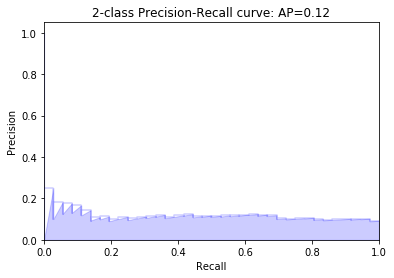

In [89]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_scores[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# step_kwargs = ({'step': 'post'}
#                if 'step' in signature(plt.fill_between).parameters
#                else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b'
#                  , **step_kwargs
                )

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [105]:
from sklearn.model_selection import KFold
X_cb = X.values
y_cb = (y == 'approved').astype(int)
kf = KFold(n_splits=2, random_state=42, shuffle=True)



for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cb[train_index], X_cb[test_index]
    y_train, y_test = y_cb.values[train_index], y_cb.values[test_index]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cb, y_cb, test_size=0.3, random_state=42, shuffle=True
)

In [60]:
y_train.size

919

In [45]:
from catboost import CatBoostClassifier, Pool

train_data = [[0, 3],
              [4, 1],
              [8, 1],
              [9, 1]]

train_labels = [0, 0, 1, 1]

eval_data = [[2, 1],
             [3, 1],
             [9, 0],
             [5, 3]]

eval_labels = [0, 1, 1, 0]

eval_dataset = Pool(X_test,
                    y_test)

model = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC')

model.fit(X_train,
          y_train,
          eval_set=eval_dataset,
          verbose=False)

print(model.get_best_iteration())

44


In [51]:
model.predict_proba(X_test)

array([[0.74898407, 0.25101593],
       [0.85290495, 0.14709505],
       [0.8219681 , 0.1780319 ],
       ...,
       [0.88582943, 0.11417057],
       [0.89169497, 0.10830503],
       [0.8353022 , 0.1646978 ]])

#### fit on balanced data set

In [137]:
len(YX)

1313

In [143]:
import random
approved_count = sum(y_cb)
YX = zip(y_cb, X_cb)
random.shuffle(YX)

X_balanced, y_balanced = [], []

for y_, x_ in YX:
    if y_ == 1:
        X_balanced.append(x_)
        y_balanced.append(y_)
    elif len(y_balanced) - sum(y_balanced) < approved_count:
        X_balanced.append(x_)
        y_balanced.append(y_)


In [144]:
len(X_balanced), approved_count

(182, 91)

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, shuffle=True
)

clf = MLPClassifier()
clf.fit(X_train, y_train)
clf.predict_proba(X_test)

array([[0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 2.14829805e-171],
       [1.00000000e+000, 5.58160587e-202],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.56225146e-142],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.36271526e-118],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.95712906e-150],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 4.46360608e-186],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 9.32694412e-145],
       [1.00000000e+000, 4.93895916e-020],
       [0.0

In [152]:
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
print f1_score(y_test, y_pred, average='macro')  

print f1_score(y_test, y_pred, average='micro')  

print f1_score(y_test, y_pred, average='weighted')  

print f1_score(y_test, y_pred, average=None)


0.40819160013884065
0.43636363636363634
0.4011485910826417
[0.27906977 0.53731343]


In [146]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_balanced, y_balanced, cv=5)
print scores

[0.47368421 0.58333333 0.47222222 0.58333333 0.55555556]


In [109]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_cb[train_index], X_cb[test_index]
    y_train, y_test = y_cb[train_index], y_cb[test_index]
# for train_idx, test_idx in stratSplit:
#     X_train=X[train_idx]
#     y_train=y[train_idx]

# print(X_train)
# # [[3 7]
# #  [2 4]]
# print(y_train)
# # [1 0]

clf = MLPClassifier()
clf.fit(X_train, y_train)
clf.predict_proba(X_test)

array([[1.00000000e+000, 3.28935636e-063],
       [1.00000000e+000, 7.76944684e-019],
       [1.00000000e+000, 6.45527951e-095],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.30678931e-022],
       [1.00000000e+000, 1.67318462e-069],
       [1.00000000e+000, 8.31888160e-097],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.18598172e-124],
       [1.00000000e+000, 5.40414155e-158],
       [1.00000000e+000, 8.15107143e-030],
       [1.00000000e+000, 6.59473818e-043],
       [1.00000000e+000, 1.90118448e-114],
       [1.00000000e+000, 3.75217348e-046],
       [1.00000000e+000, 1.17446810e-020],
       [1.00000000e+000, 8.96582358e-023],
       [1.00000000e+000, 1.90270645e-134],
       [1.00000000e+000, 7.96142120e-041],
       [1.00000000e+000, 1.30001148e-093],
       [1.00000000e+000, 2.49215738e-038],
       [1.00000000e+000, 1.70182790e-035],
       [1.00000000e+000, 5.69933081e-049],
       [1.00000000e+000, 4.74008172e-064],
       [1.0

In [115]:
sum(y_cb)

91

In [93]:
clf = MLPClassifier()

X_train, X_test, y_train, y_test = train_test_split(
    X_cb, y_cb, test_size=0.3, random_state=42, shuffle=True
)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [94]:
clf.predict_proba(X_test)

array([[1.00000000e+000, 2.73091530e-135],
       [1.00000000e+000, 4.97853941e-060],
       [1.00000000e+000, 6.89112134e-015],
       [1.00000000e+000, 3.22445568e-037],
       [1.00000000e+000, 3.96233444e-080],
       [1.00000000e+000, 9.41412978e-062],
       [1.00000000e+000, 7.69969877e-016],
       [1.00000000e+000, 3.94537293e-084],
       [1.00000000e+000, 2.52886717e-074],
       [1.00000000e+000, 7.83933442e-011],
       [1.00000000e+000, 3.21876773e-081],
       [1.00000000e+000, 2.03685821e-067],
       [1.00000000e+000, 4.52145764e-063],
       [1.00000000e+000, 9.90008602e-055],
       [1.00000000e+000, 9.65916163e-098],
       [9.57117536e-005, 9.99904288e-001],
       [1.00000000e+000, 2.63791162e-116],
       [1.00000000e+000, 1.21434355e-015],
       [1.00000000e+000, 2.72294267e-025],
       [1.00000000e+000, 3.29013084e-020],
       [1.00000000e+000, 9.68264663e-146],
       [1.00000000e+000, 4.35331535e-043],
       [1.00000000e+000, 1.16941838e-167],
       [1.0